## Planar 3 

In [1]:
# We will do the imports required for this notebook here

# numpy provides import array and linear algebra utilities
import numpy as np

# the robotics toolbox provides robotics specific functionality
import roboticstoolbox as rtb

# spatial math provides objects for representing transformations
import spatialmath as sm

# the matplotlib library provides plotting functionality
import matplotlib.pyplot as plt

In [2]:
models_list = rtb.models.list()

┌──────────────┬───────────────────────┬─────────────────────┬──────┬─────┬──────┬────────────────────────────────────────────────────────────┬──────────┬──────────┬──────────────────────────┐
│    class     │         name          │    manufacturer     │ type │ DoF │ dims │                                                  structure │ dynamics │ geometry │         keywords         │
├──────────────┼───────────────────────┼─────────────────────┼──────┼─────┼──────┼────────────────────────────────────────────────────────────┼──────────┼──────────┼──────────────────────────┤
│ Panda        │ Panda                 │ Franka Emika        │ DH   │ 7   │ 3d   │ RRRRRRR                                                    │ Y        │ Y        │                          │
│ Puma560      │ Puma 560              │ Unimation           │ DH   │ 6   │ 3d   │ RRRRRR                                                     │ Y        │ Y        │ dynamics, symbolic, mesh │
│ Stanford     │ Stanford arm      

## Loading Model from list

In [3]:
planar3_model = rtb.models.DH.Planar3()

planar3_model

DHRobot: Planar 3 link, 3 joints (RRR), dynamics, standard DH parameters
┌─────┬────┬────┬──────┐
│ θⱼ  │ dⱼ │ aⱼ │  ⍺ⱼ  │
├─────┼────┼────┼──────┤
│  q1 │  0 │  1 │ 0.0° │
│  q2 │  0 │  1 │ 0.0° │
│  q3 │  0 │  1 │ 0.0° │
└─────┴────┴────┴──────┘

┌──┬──┐
└──┴──┘

┌──────┬─────┬─────┬─────┐
│ name │ q0  │ q1  │ q2  │
├──────┼─────┼─────┼─────┤
│   qr │  0° │  0° │  0° │
│   qz │  0° │  0° │  0° │
└──────┴─────┴─────┴─────┘

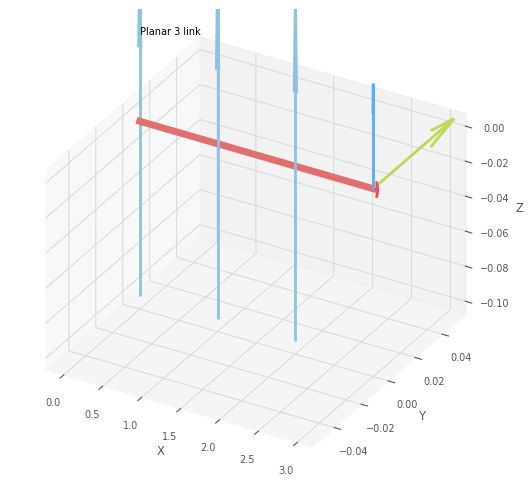

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'Planar 3 link')

<Figure size 640x480 with 0 Axes>

In [4]:
planar3_model.plot(planar3_model.qz, backend='pyplot', movie='Planar3.gif')

## Making Elementary Transforms and Sequences

In [5]:
E1 = rtb.ET.Ry()
E2 = rtb.ET.tx(1)
E3 = rtb.ET.Rz()

planar3_y = E1 * E2 * E1 * E2 * E1 * E2
planar3_z = E3 * E2 * E3 * E2 * E3 * E2

planar3_points = np.array([[0, 0, 0], [1, 0, 0], [2, 0, 0], [3, 0, 0]])

print(planar3_y)
print(planar3_z)
print(planar3_points)

Ry(q0) ⊕ tx(1) ⊕ Ry(q1) ⊕ tx(1) ⊕ Ry(q2) ⊕ tx(1)
Rz(q0) ⊕ tx(1) ⊕ Rz(q1) ⊕ tx(1) ⊕ Rz(q2) ⊕ tx(1)
[[0 0 0]
 [1 0 0]
 [2 0 0]
 [3 0 0]]


## Forward Kinematics

In [6]:
qz = np.array([0, 0, 0]) # qz is the zero position
qr = np.array([-2, 1, 1.5]) # qr is the ready position

base_point = planar3_y.fkine(qz).t

fk_y = planar3_y.fkine(qr)
fk_z = planar3_z.fkine(qr)

print(f"The base point of the end-effector is: \n{base_point}")

# The ETS class has the .fkine method which can calculate the forward kinematics
# The .fkine methods returns an SE3 object
print(f"The fkine method (y): \n{fk_y}")

print(f"The fkine method (z): \n{fk_z}")

The base point of the end-effector is: 
[3. 0. 0.]
The fkine method (y): 
   0.8776    0         0.4794    1.002     
   0         1         0         0         
  -0.4794    0         0.8776    1.271     
   0         0         0         1         

The fkine method (z): 
   0.8776   -0.4794    0         1.002     
   0.4794    0.8776    0        -1.271     
   0         0         1         0         
   0         0         0         1         



## Inverse Kinematics to find a different configuration

In [7]:
# The ETS class has the .ikine_LM method which can calculate the inverse kinematics

ik_y = planar3_y.ikine_LM(fk_y) # inverse kinematics
ik_z = planar3_z.ikine_LM(fk_z) # inverse kinematics

print(ik_y)
print(f"The ikine method (y): \n{ik_y.q}")
print(ik_z)
print(f"The ikine method (z): \n{ik_z.q}")

IKSolution: q=[-1, -1, 2.5], success=True, iterations=8, searches=1, residual=1.28e-09
The ikine method (y): 
[-1.         -1.00000001  2.5       ]
IKSolution: q=[-2, 1, 1.5], success=True, iterations=10, searches=1, residual=7.37e-08
The ikine method (z): 
[-2.00000016  1.00000032  1.49999984]


## Plotting Trajectories

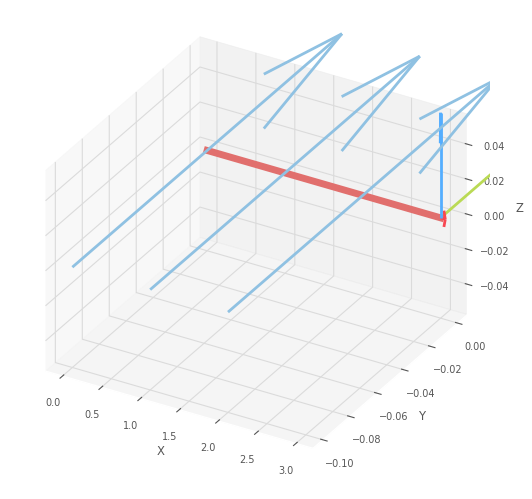

<Figure size 640x480 with 0 Axes>

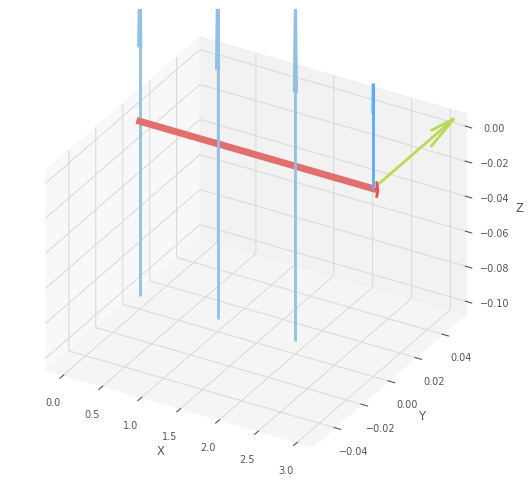

<Figure size 640x480 with 0 Axes>

In [8]:
# Animate the trajectory of manipulator, planar3, from qz to qr
qt = rtb.tools.trajectory.jtraj(qz, qr, 50)

# Plot the trajectory of the planar3 manipulator
planar3_y.plot(qt.q, backend="pyplot", movie='Media/Planar3/Planar3 Y.gif')

planar3_z.plot(qt.q, backend="pyplot", movie='Media/Planar3/Planar3 Z.gif')

## Plotting Inverse Kinematics

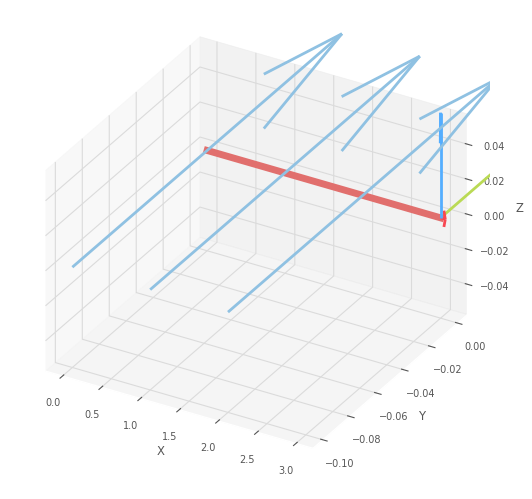

<Figure size 640x480 with 0 Axes>

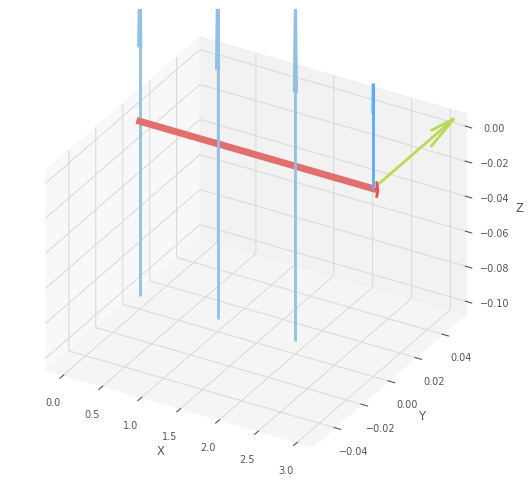

<Figure size 640x480 with 0 Axes>

In [9]:
qt_y = rtb.tools.trajectory.jtraj(qz, ik_y.q, 50)

qt_z = rtb.tools.trajectory.jtraj(qz, ik_z.q, 50)

# Plot the trajectory of the planar3 manipulator
planar3_y.plot(qt_y.q, backend="pyplot", movie='Media/Planar3/Planar3 Y IK.gif')

planar3_z.plot(qt_z.q, backend="pyplot", movie='Media/Planar3/Planar3 Z IK.gif')

## Finding Workspace of the Manipulator

credits to:

- [A Tutorial on Manipulator Differential Kinematics, Notebook 5 Manipulator Performance Measures](https://github.com/jhavl/dkt)
- [Workspace Analysis for Manipulators](https://www.mathworks.com/help/robotics/ug/workspace-analysis-for-manipulators.html)

for the inspiration!

### Generating a lot of random end-effector positions from random joint angles

In [10]:
q_lim = planar3_model.qlim

print(q_lim) # Joint limits of the planar3 model, all are [-pi, pi] but we will restrict further

[[-3.14159265 -3.14159265 -3.14159265]
 [ 3.14159265  3.14159265  3.14159265]]


In [11]:
import random

list_of_points = [] # List of end effector positions
list_q_point = [] # List of joint angles
n_points = 100000

for i in range(n_points):
    # Define the joint limits
    q_rand = [random.uniform(-np.pi/2, np.pi/2), random.uniform(-3*np.pi/4, 3*np.pi/4), random.uniform(-np.pi/2, np.pi/2)]

    q_point = np.array(q_rand)
    fk_planar3 = planar3_y.fkine(q_point)

    list_q_point.append(q_point) # The joint angles
    list_of_points.append(fk_planar3.t) # The position of the end effector

list_of_points = np.array(list_of_points)
list_q_point = np.array(list_q_point)
print(list_of_points)

[[-1.61367007  0.         -0.9906641 ]
 [ 1.64298191  0.         -2.47733673]
 [-1.5554637   0.          1.61160872]
 ...
 [-1.17875795  0.         -0.39433569]
 [-0.25149872  0.          2.16126743]
 [-1.49540542  0.         -0.97512166]]


### Calculating Yoshikawa manipulability index for rotation axes

In [12]:
def manipulability(robot, q, axes):
    """
    Calculates the manipulability of the robot at joint configuration q

    :robot: A Robot object to find the manipulability of
    :q: The joint coordinates of the robot (ndarray)
    :axes: A boolean list which correspond with the Cartesian axes to
        find the manipulability of (6 boolean values in a list)
    """
    # calculate the Jacobian
    J = robot.jacobe(q)

    # only keep the selected axes of J
    J = J[axes, :]

    # calculate the manipulability
    m = np.sqrt(np.linalg.det(J @ J.T))

    return m

In [13]:
# create a Robot instance
planar3_robot = rtb.Robot(planar3_y)

# Only the rotation axes
rot_axes = [False, False, False, True, True, True]

list_rot_manipulability = []

for i in range(n_points):
    rot_manipulability = manipulability(planar3_robot, list_q_point[i], rot_axes)
    list_rot_manipulability.append(rot_manipulability)

list_rot_manipulability = np.array(list_rot_manipulability)
# print(list_rot_manipulability)

print(planar3_robot)

ERobot: , 3 joints (RRR)
┌──────┬────────┬───────┬────────┬─────────────────────┐
│ link │  link  │ joint │ parent │ ETS: parent to link │
├──────┼────────┼───────┼────────┼─────────────────────┤
│    0 │ link0  │     0 │ BASE   │ Ry(q0)              │
│    1 │ link1  │     1 │ link0  │ tx(1) ⊕ Ry(q1)      │
│    2 │ link2  │     2 │ link1  │ tx(1) ⊕ Ry(q2)      │
│    3 │ @link3 │       │ link2  │ tx(1)               │
└──────┴────────┴───────┴────────┴─────────────────────┘



### Plot the points on a 3D plot

C:\Users\Tal I\AppData\Local\Temp\ipykernel_7288\69182165.py:26: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(scatter, ax=ax)


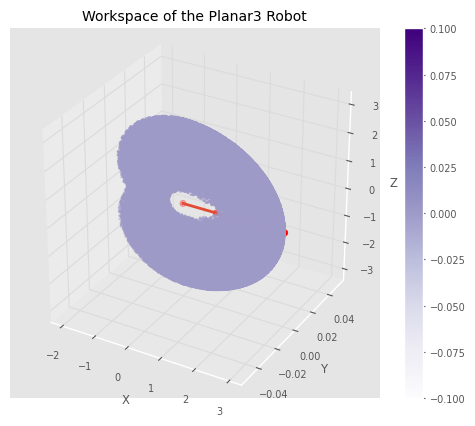

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = list_of_points[:,0]
y = list_of_points[:,1]
z = list_of_points[:,2]
c = list_rot_manipulability
cmap = plt.cm.Purples
s = 2

scatter = ax.scatter(x, y, z, c=c, cmap=cmap, s=s)

planar3_points_x = planar3_points[:,0]
planar3_points_y = planar3_points[:,1]
planar3_points_z = planar3_points[:,2]

planar3_plot = ax.scatter3D(planar3_points_x, planar3_points_y, planar3_points_z, color='red')
planar3_plot = ax.plot3D(planar3_points_x, planar3_points_y, planar3_points_z, linewidth=s)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_box_aspect([1,1,1])

fig.colorbar(scatter, ax=ax)

plt.title('Workspace of the Planar3 Robot')

plt.show()